# This R notebook analyses growth curves for Plasmid-bearing and WT populations to estimate growth related parameters
## Growth rates, lag phase, exponential phase, and stationary phase are calculated using the R package 'growthrates' - Hall, B. G., H. Acar, A. Nandipati, and M. Barlow. 2014. “Growth Rates Made Easy.” Mol. Biol. Evol. 31: 232–38. https://doi.org/10.1093/molbev/mst197.

## Prepare system

### Mount Gdrive
#### Either run this code to mount another account Gdrive or use the button on the left panel to avoid code confirmations

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load notebook R magic to be able to natively run R code by adding "%%R" at the beggining of a cell
#### R variables can be tranfered to python by %Rget() 

In [2]:
%load_ext rpy2.ipython

### Install and load growthrates package 

In [3]:
%%R
install.packages('growthrates', repos='http://cran.rstudio.com/',quiet=TRUE)
install.packages("gridExtra",quiet=TRUE)
library("growthrates")               
library("gridExtra")               

R[write to console]: also installing the dependencies ‘rootSolve’, ‘coda’, ‘minpack.lm’, ‘minqa’, ‘deSolve’, ‘FME’


R[write to console]: Loading required package: lattice

R[write to console]: Loading required package: deSolve



In [6]:
%%R
citation("growthrates")


To cite package ‘growthrates’ in publications use:

  Thomas Petzoldt (2020). growthrates: Estimate Growth Rates from
  Experimental Data. R package version 0.8.2.
  https://CRAN.R-project.org/package=growthrates

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {growthrates: Estimate Growth Rates from Experimental Data},
    author = {Thomas Petzoldt},
    year = {2020},
    note = {R package version 0.8.2},
    url = {https://CRAN.R-project.org/package=growthrates},
  }



In [ ]:
#import matplotlib.pyplot as plt
#import pandas as pd

### Setup file paths

In [7]:
%%R
rootDir="/content/drive/My Drive/SYNC_Projects/Plasmidia/ms/"
tableDir="/content/drive/My Drive/SYNC_Projects/Plasmidia/ms/data/parameters/"

### Load data files

In [13]:
%%R

file1="data/Synergy_191109/Plasmidia_Kin-24h_amps(0,1,2,25,3,35,4,6).txt"
file1=paste(rootDir,file1,sep='')
data_table1=read.table(file1,sep="\t",dec=".",skip=45,header=T,nrows=73)#,fill=T)

#head(data_table1)
#tail(data_table1)

file2="data/Synergy_190724/pBGTvsWT-2.txt"
file2=paste(rootDir,file2,sep='')
data_table2=read.table(file2,sep="\t",dec=".",skip=45,header=T,nrows=74)#,fill=T)

#head(data_table2)
#tail(data_table2)

file3="./data/Synergy_190702/pBGTvsWT.txt"
file3=paste(rootDir,file3,sep='')
data_table3=read.table(file3,sep="\t",dec=".",skip=45,header=T,nrows=73)#,fill=T)
#head(data_table3)
#tail(data_table3)

### Define plate definitions  (frequency -Amp)


In [14]:
%%R
c_names=as.character(seq(from=1,to=12))
r_names=LETTERS[seq(from=1,to=8)]
plate = matrix("x", 8, 12)
colnames(plate) <- c_names
rownames(plate) <- r_names

plate1=plate

plate1[1,] <- cbind("0.0-0","0.1-0","0.2-0","0.3-0","0.4-0","0.5-0","0.6-0","0.7-0","0.8-0","0.9-0","1.0-0","x")
plate1[2,] <- cbind("0.0-1","0.1-1","0.2-1","0.3-1","0.4-1","0.5-1","0.6-1","0.7-1","0.8-1","0.9-1","1.0-1","x")
plate1[3,] <- cbind("0.0-2","0.1-2","0.2-2","0.3-2","0.4-2","0.5-2","0.6-2","0.7-2","0.8-2","0.9-2","1.0-2","x")
plate1[4,] <- cbind("0.0-2.5","0.1-2.5","0.2-2.5","0.3-2.5","0.4-2.5","0.5-2.5","0.6-2.5","0.7-2.5","0.8-2.5","0.9-2.5","1.0-2.5","x")
plate1[5,] <- cbind("0.0-3","0.1-3","0.2-3","0.3-3","0.4-3","0.5-3","0.6-3","0.7-3","0.8-3","0.9-3","1.0-3","x")
plate1[6,] <- cbind("0.0-3.5","0.1-3.5","0.2-3.5","0.3-3.5","0.4-3.5","0.5-3.5","0.6-3.5","0.7-3.5","0.8-3.5","0.9-3.5","1.0-3.5","x")
plate1[7,] <- cbind("0.0-4","0.1-4","0.2-4","0.3-4","0.4-4","0.5-4","0.6-4","0.7-4","0.8-4","0.9-4","1.0-4","x")
plate1[8,] <- cbind("0.0-6","0.1-6","0.2-6","0.3-6","0.4-6","0.5-6","0.6-6","0.7-6","0.8-6","0.9-6","1.0-6","x")
plate1

plate2=plate
plate2[1,] <- cbind("0.0-0","0.1-0","0.2-0","0.3-0","0.4-0","0.5-0","0.6-0","0.7-0","0.8-0","0.9-0","1.0-0","x")
plate2[2,] <- cbind("0.0-4","0.1-4","0.2-4","0.3-4","0.4-4","0.5-4","0.6-4","0.7-4","0.8-4","0.9-4","1.0-4","x")
plate2[3,] <- cbind("0.0-32","0.1-32","0.2-32","0.3-32","0.4-32","0.5-32","0.6-32","0.7-32","0.8-32","0.9-32","1.0-32","x")
plate2[4,] <- cbind("0.0-64","0.1-64","0.2-64","0.3-64","0.4-64","0.5-64","0.6-64","0.7-64","0.8-64","0.9-64","1.0-64","x")
plate2[5,] <- cbind("0.0-128","0.1-128","0.2-128","0.3-128","0.4-128","0.5-128","0.6-128","0.7-128","0.8-128","0.9-128","1.0-128","x")
plate2[6,] <- cbind("0.0-256","0.1-256","0.2-256","0.3-256","0.4-256","0.5-256","0.6-256","0.7-256","0.8-256","0.9-256","1.0-256","x")
plate2[7,] <- cbind("0.0-512","0.1-512","0.2-512","0.3-512","0.4-512","0.5-512","0.6-512","0.7-512","0.8-512","0.9-512","1.0-512","x")
plate2[8,] <- cbind("0.0-1024","0.1-1024","0.2-1024","0.3-1024","0.4-1024","0.5-1024","0.6-1024","0.7-1024","0.8-1024","0.9-1024","1.0-1024","x")



### Define times for each plate
##### Some plates were read in interrupted mode so times were restarted several times

In [16]:
%%R
time_min1=c()
ttime=0.0
for(time in data_table1$Time){
    ttimex=round(ttime,digits=2)
    time_min1=c(time_min1,ttimex)
    ttime=ttime+0.3333333
}

print(length(time_min1))

time_min2=c()
ttime=0.0
for(time in data_table2$Time){
    ttimex=round(ttime,digits=2)
    time_min2=c(time_min2,ttimex)
    ttime=ttime+0.3333333
}

print(length(time_min2))

time_min3=c()
ttime=0.0
for(time in data_table3$Time){
    ttimex=round(ttime,digits=2)
    time_min3=c(time_min3,ttimex)
    ttime=ttime+0.3333333
    #ttime=ttime+20
}

print(length(time_min3))


[1] 73
[1] 74
[1] 73


### Create data frames with growth curves and estimate growth rates (v_maxs) using a **linear model**, not the best but great estimating **lag phase**

In [17]:
%%R


df_vmax1=data.frame()
df_growths1=data.frame()
df_vmax2=data.frame()
df_growths2=data.frame()
df_vmax3=data.frame()
df_growths3=data.frame()

wells=colnames(data_table1)[3:(length(colnames(data_table1)))]

for(col in wells){
    vcol=unlist(strsplit(col,""))
    x=vcol[1]
    if(length(vcol)==3){
        y=paste(vcol[2],vcol[3],sep="")
    }else{
        y=vcol[2]
    }
    
    strain=plate1[x,y]
    #print(c(strain,x,y))
    
    if(strain == "x"){next}
    n=dim(data_table1[col])[1]
    amp_name=strsplit(strain,"-")[[1]][2]
    freq_name=strsplit(strain,"-")[[1]][1]
    vec_ods=as.numeric(gsub(",", ".",data_table1[col][1:n,]))
    
    this_dfG=data.frame(strain_x=c(strain),freq=c(freq_name),time=time_min1,value=vec_ods,Amp=c(amp_name))
    df_growths1=rbind(df_growths1,this_dfG)

    if(vec_ods[length(vec_ods)]-vec_ods[1]<.01){   #### fix for fit_easylinear crashing upon non-growing population
        rsucks=data.frame(x=time_min1,y=vec_ods)
        tmodel=lm(y ~x,rsucks)
        resm=coef(tmodel)
        this_r=summary(tmodel)$r.squared   #[[1]]
        this_vmax=resm[2][[1]]  #coef(model)[2][[1]]
        print(c(freq_name,amp_name,this_vmax))
        #print(this_vmax)
    }else{
        tmodel=fit_easylinear(time_min1, vec_ods)
        resm=coef(tmodel)
        this_vmax=resm[3][[1]]  #coef(model)[2][[1]]
        this_lag=resm[4][[1]]
        this_r=rsquared(tmodel)[[1]]
    }

    this_dfV=data.frame(strain_x=c(strain),freq=c(freq_name),vmax=c(this_vmax),r_squared=c(this_r),Amp=c(amp_name),lag=c(this_lag))
    df_vmax1=rbind(df_vmax1,this_dfV)
    ##########################################2
    strain=plate2[x,y]
    #print(c(strain,x,y))
    
    if(strain == "x"){next}
    n=dim(data_table2[col])[1]
    amp_name=strsplit(strain,"-")[[1]][2]
    freq_name=strsplit(strain,"-")[[1]][1]
    
    vec_ods=as.numeric(gsub(",", ".",data_table2[col][1:n,]))
    vec_ods[5]=vec_ods[5]-0.22                        ########### fix read error due to uncontinous reading
    vec_ods[71]=vec_ods[71]-0.19
    vec_ods[60]=vec_ods[60]-0.27
    #for(x in vec_ods){if(x<.05){print(vec_ods);print(strain)}}
    
    this_dfG=data.frame(strain_x=c(strain),freq=c(freq_name),time=time_min2,value=vec_ods,Amp=c(amp_name))
    df_growths2=rbind(df_growths2,this_dfG)

    if(vec_ods[length(vec_ods)]-vec_ods[1]<.01){   #### fix for fit_easylinear crashing upon non-growing population
        rsucks=data.frame(x=time_min2,y=vec_ods)
        tmodel=lm(y ~x,rsucks)
        resm=coef(tmodel)
        this_r=summary(tmodel)$r.squared   #[[1]]
        this_vmax=resm[2][[1]]  #coef(model)[2][[1]]
        print(c(freq_name,amp_name,this_vmax))
        #print(this_vmax)
    }else{
        tmodel=fit_easylinear(time_min2, vec_ods)
        resm=coef(tmodel)
        this_vmax=resm[3][[1]]  #coef(model)[2][[1]]
        this_lag=resm[4][[1]]
        this_r=rsquared(tmodel)[[1]]
    }

    this_dfV=data.frame(strain_x=c(strain),freq=c(freq_name),vmax=c(this_vmax),r_squared=c(this_r),Amp=c(amp_name),lag=c(this_lag))
    df_vmax2=rbind(df_vmax2,this_dfV)
    ################3333
    n=dim(data_table3[col])[1]
    vec_ods=as.numeric(gsub(",", ".",data_table3[col][1:n,]))
    this_dfG=data.frame(strain_x=c(strain),freq=c(freq_name),time=time_min3,value=vec_ods,Amp=c(amp_name))
    df_growths3=rbind(df_growths3,this_dfG)

    if(vec_ods[length(vec_ods)]-vec_ods[1]<.01){   #### fix for fit_easylinear crashing upon non-growing population
        rsucks=data.frame(x=time_min3,y=vec_ods)
        tmodel=lm(y ~x,rsucks)
        resm=coef(tmodel)
        this_r=summary(tmodel)$r.squared   #[[1]]
        this_vmax=resm[2][[1]]  #coef(model)[2][[1]]
        print(c(freq_name,amp_name,this_vmax))
        #print(this_vmax)
    }else{
        tmodel=fit_easylinear(time_min3, vec_ods)
        resm=coef(tmodel)
        #print(resm)
        this_vmax=resm[3][[1]]  #coef(model)[2][[1]]
        this_lag=resm[4][[1]]
        this_r=rsquared(tmodel)[[1]]
    }

    this_dfV=data.frame(strain_x=c(strain),freq=c(freq_name),vmax=c(this_vmax),r_squared=c(this_r),Amp=c(amp_name),lag=c(this_lag))
    df_vmax3=rbind(df_vmax3,this_dfV)

}


[1] "0.0"                   "32"                    "-0.000204150628008452"
[1] "0.0"                   "32"                    "-0.000169281992227886"
[1] "0.0"                  "64"                   "0.000103096294629233"
[1] "0.0"                   "64"                    "-8.63528364847874e-05"
[1] "0.0"                  "128"                  "7.92730171265291e-05"
[1] "0.0"                   "128"                   "-3.51697812442954e-05"
[1] "0.0"                  "3.5"                  "-5.3035119356232e-05"
[1] "0.0"                   "256"                   "-2.74560845271456e-05"
[1] "0.0"                   "256"                   "-2.24913333395543e-05"
[1] "0.0"                   "4"                     "-0.000134209395757281"
[1] "0.0"                  "512"                  "2.17772096357267e-05"
[1] "0.0"                   "512"                   "-2.11946107877558e-05"
[1] "0.0"                   "6"                     "-1.20314749827524e-05"
[1] "0.0"               

In [18]:
%%R
df_vmax1

   strain_x freq          vmax r_squared Amp      lag
1     0.0-0  0.0  4.826305e-01 0.9989132   0 1.520646
2     0.1-0  0.1  4.249247e-01 0.9993230   0 1.255386
3     0.2-0  0.2  4.659023e-01 0.9991330   0 1.448850
4     0.3-0  0.3  4.771207e-01 0.9995305   0 1.516905
5     0.4-0  0.4  4.740133e-01 0.9991586   0 1.380048
6     0.5-0  0.5  4.096652e-01 0.9996643   0 1.606767
7     0.6-0  0.6  5.010438e-01 0.9987212   0 1.407830
8     0.7-0  0.7  4.827273e-01 0.9991092   0 1.382542
9     0.8-0  0.8  4.484953e-01 0.9991916   0 1.390194
10    0.9-0  0.9  4.494389e-01 0.9997499   0 1.474105
11    1.0-0  1.0  4.900130e-01 0.9986899   0 1.548390
12    0.0-1  0.0  3.903482e-01 0.9991776   1 1.681423
13    0.1-1  0.1  4.775919e-01 0.9996722   1 1.623254
14    0.2-1  0.2  4.406757e-01 0.9996332   1 1.470541
15    0.3-1  0.3  4.687803e-01 0.9994537   1 1.342308
16    0.4-1  0.4  4.669102e-01 0.9995343   1 1.243003
17    0.5-1  0.5  4.593653e-01 0.9996994   1 1.298608
18    0.6-1  0.6  4.677996e-

### Visualize plate curves

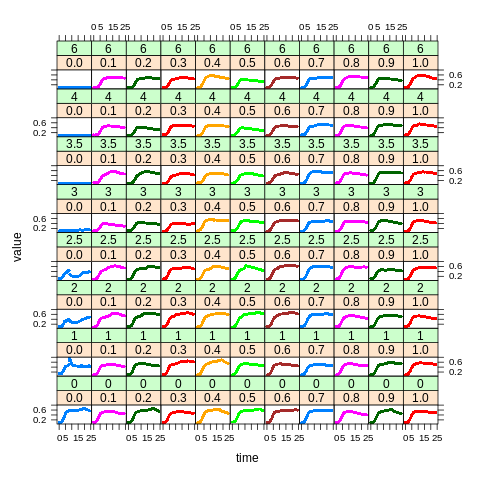

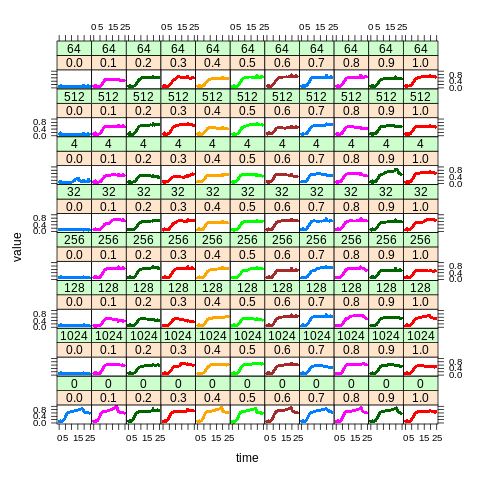

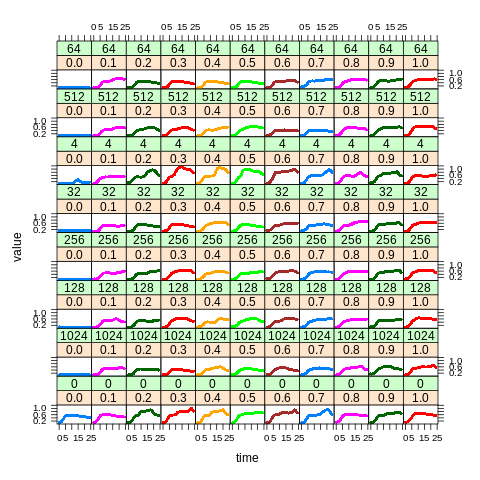

In [19]:
%%R
#options(repr.plot.width = 22, repr.plot.height = 16)

p1=xyplot(value ~ time | freq+Amp, data = df_growths1,groups = freq, pch = 16, cex = 0.5,layout=c(11, 8))
p2=xyplot(value ~ time | freq+Amp, data = df_growths2,groups = freq, pch = 16, cex = 0.5,layout=c(11, 8))
p3=xyplot(value ~ time | freq+Amp, data = df_growths3,groups = freq, pch = 16, cex = 0.5,layout=c(11, 8))
print(p1)
print(p2)
print(p3)

### Convert lag times to table

In [20]:
%%R

llag_table1=plate1
llag_table2=plate2
llag_table3=plate2

cn=colnames(df_vmax3)
indexL=match("lag",cn)

for(col in wells){
    vcol=unlist(strsplit(col,""))
    x=vcol[1]
    if(length(vcol)==3){
        y=paste(vcol[2],vcol[3],sep="")
    }else{
        y=vcol[2]
    }
    
    freq_amp1=plate1[x,y]
    freq_amp2=plate2[x,y]
    if(freq_amp1 == "x"){next}
    subdf=df_vmax1[df_vmax1["strain_x"]==freq_amp1]
    this_l=subdf[indexL]
    llag_table1[x,y]=this_l
    
    subdf=df_vmax2[df_vmax2["strain_x"]==freq_amp2]
    this_l=subdf[indexL]
    llag_table2[x,y]=this_l
    
    subdf=df_vmax3[df_vmax3["strain_x"]==freq_amp2]
    this_l=subdf[indexL]
    llag_table3[x,y]=this_l
}

llag_table3

  1            2            3            4            5            6           
A " 1.0801381" " 0.7990461" " 0.9703343" " 1.1126414" " 1.0872744" " 1.1153347"
B "10.1582786" " 1.0510272" " 1.2157579" " 0.9024713" " 0.9111525" " 1.0218042"
C " 1.6883688" " 2.5400591" " 2.1536108" " 1.8863731" " 1.6079269" " 1.5213663"
D " 1.9387669" " 2.5856688" " 2.2787304" " 2.0545084" " 1.8062023" " 1.7402327"
E " 9.0561730" " 2.5584801" " 2.1629268" " 1.9244105" " 1.6224242" " 1.8046219"
F " 1.2737440" " 2.5794847" " 2.2183400" " 2.0150802" " 1.8121811" " 1.5737127"
G " 1.4601675" " 2.4645407" " 2.0600683" " 1.9527591" " 1.7157368" " 1.5423964"
H " 1.3760112" " 2.5312540" " 2.1265948" " 1.9190521" " 1.7336227" " 1.6614368"
  7            8            9            10           11           12 
A " 1.2051068" " 1.1098240" " 1.4536850" " 1.2293188" " 1.4821892" "x"
B " 1.0512797" " 1.1135020" " 1.1324584" " 1.4749270" " 1.2262023" "x"
C " 1.6543153" " 1.1827825" " 1.0977823" " 1.2985837" " 1.2257062" 

## Estimate K (~max OD/Carrying capacity) and h0 (lag phase) from non linear model

In [21]:
%%R
p       <- c(y0 = 0.03, mumax = .1, K = 0.1, h0 = 1)
lower   <- c(y0 = 0.001, mumax = 1e-2, K = 0.005, h0 = 0)
upper   <- c(y0 = 0.2,   mumax = 2,    K = 1.5,   h0 = 10)

mfunction=grow_baranyi            ## get K well and large h0
#mfunction=grow_logistic          ## get somewhat well K and no h0 
#mfunction=grow_twostep          ## doesnt work
#mfunction=ode_genlogistic
many_fitsK1 <- all_growthmodels(value ~ time | strain_x ,FUN=mfunction,data = df_growths1,p = p, lower = lower, upper = upper, ncores = 6)#, log = "y")
many_fitsK2 <- all_growthmodels(value ~ time | strain_x ,FUN=mfunction,data = df_growths2,p = p, lower = lower, upper = upper, ncores = 6)#, log = "y")
many_fitsK3 <- all_growthmodels(value ~ time | strain_x ,FUN=mfunction,data = df_growths3,p = p, lower = lower, upper = upper, ncores = 6)#, log = "y")
many_fitsK4 <- all_growthmodels(value ~ time | strain_x ,FUN=mfunction,data = df_growths3,p = p, lower = lower, upper = upper, ncores = 6, log = "y")

many_fit_resK1   <- results(many_fitsK1)
many_fit_resK2   <- results(many_fitsK2)
many_fit_resK3   <- results(many_fitsK3)
many_fit_resK4   <- results(many_fitsK4)
head(many_fit_resK3)


         strain_x         y0     mumax          K           h0        r2
0.0-0       0.0-0 0.19978754 0.4645833 0.51712284 3.286297e-03 0.7381413
0.0-1024 0.0-1024 0.08963970 1.9999983 0.08698545 1.534799e+00 0.8918426
0.0-128   0.0-128 0.09418837 1.9816771 0.09097758 1.972825e+00 0.7011666
0.0-256   0.0-256 0.09119978 1.9680839 0.08898374 1.736500e+00 0.6321206
0.0-32     0.0-32 0.14837365 0.1851457 0.14338156 2.596543e-06 0.6946037
0.0-4       0.0-4 0.09264656 0.9767598 0.19827681 9.710448e+00 0.5346443


In [22]:
%%R
head(many_fit_resK4)

         strain_x         y0     mumax          K           h0        r2
0.0-0       0.0-0 0.19978754 0.4645833 0.51712284 3.286297e-03 0.7381413
0.0-1024 0.0-1024 0.08963970 1.9999983 0.08698545 1.534799e+00 0.8918426
0.0-128   0.0-128 0.09418837 1.9816771 0.09097758 1.972825e+00 0.7011666
0.0-256   0.0-256 0.09119978 1.9680839 0.08898374 1.736500e+00 0.6321206
0.0-32     0.0-32 0.14837365 0.1851457 0.14338156 2.596543e-06 0.6946037
0.0-4       0.0-4 0.09264656 0.9767598 0.19827681 9.710448e+00 0.5346443


### Obtain time to reach K and make table

In [23]:
%%R

k_table1=plate1
k_table2=plate2
k_table3=plate2

lag_table1=plate1
lag_table2=plate2
lag_table3=plate2



cn=colnames(many_fit_resK1)
indexK=match("K",cn)
indexL=match("h0",cn)

for(col in wells){
    vcol=unlist(strsplit(col,""))
    x=vcol[1]
    if(length(vcol)==3){
        y=paste(vcol[2],vcol[3],sep="")
    }else{
        y=vcol[2]
    }
    
    freq_amp1=plate1[x,y]
    freq_amp2=plate2[x,y]
    if(freq_amp1 == "x"){next}
    subdf=many_fit_resK1[many_fit_resK1["strain_x"]==freq_amp1]
    this_k=subdf[indexK]
    this_l=subdf[indexL]
    k_table1[x,y]=this_k
    lag_table1[x,y]=this_l
    subdf=many_fit_resK2[many_fit_resK2["strain_x"]==freq_amp2]
    this_k=subdf[indexK]
    this_l=subdf[indexL]
    k_table2[x,y]=this_k
    lag_table2[x,y]=this_l
    subdf=many_fit_resK3[many_fit_resK3["strain_x"]==freq_amp2]
    this_k=subdf[indexK]
    this_l=subdf[indexL]
    k_table3[x,y]=this_k
    lag_table3[x,y]=this_l
}
k_table1
k_table2
k_table3



  1            2            3            4            5            6           
A "0.51712284" "0.55099970" "0.76948959" "0.87666813" "0.79207036" "0.70611880"
B "0.19827681" "0.51469449" "0.88256285" "1.01083917" "1.05134045" "0.88115151"
C "0.14338156" "0.44707043" "0.46422103" "0.48341179" "0.62063341" "0.45729832"
D "0.08929520" "0.64019986" "0.45655286" "0.44497160" "0.44490739" "0.43726797"
E "0.09097758" "0.51244777" "0.48402058" "0.59451823" "0.60059180" "0.56286489"
F "0.08898374" "0.50162053" "0.57364879" "0.61711993" "0.55277438" "0.51981361"
G "0.08800250" "0.59031460" "0.54719767" "0.54272817" "0.57312540" "0.63128742"
H "0.08698545" "0.50171716" "0.43857307" "0.39406744" "0.51619385" "0.44064847"
  7            8            9            10           11           12 
A "0.76229961" "0.81446483" "0.58779507" "0.69721036" "0.63458440" "x"
B "0.87491738" "0.94145448" "0.61548790" "0.73588537" "0.56637007" "x"
C "0.60575425" "0.51803041" "0.71285616" "0.58219020" "0.63409380" 

### Plot non-linear model

[1] ""
[1] ""


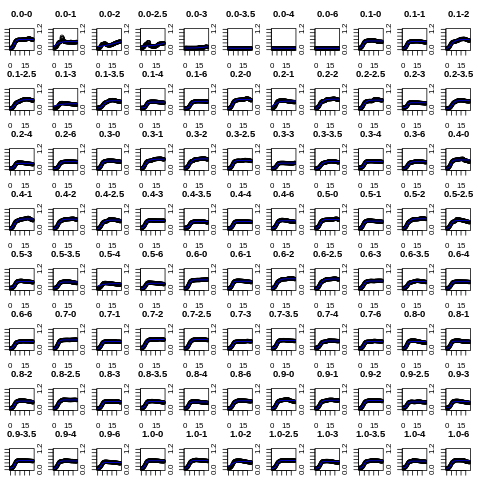

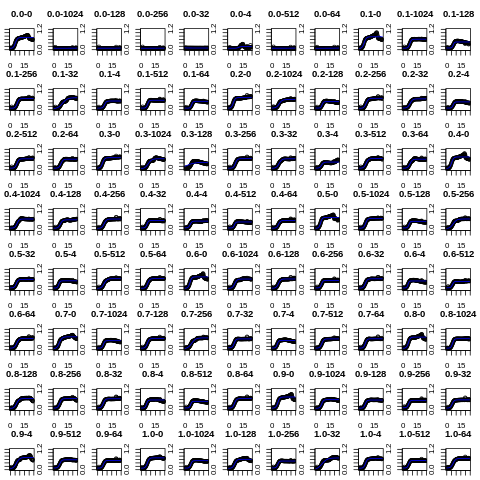

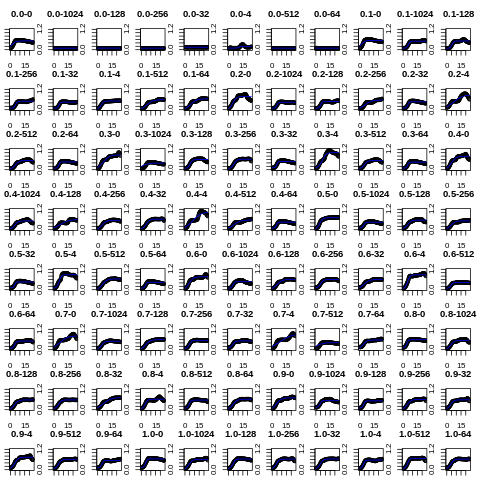

In [24]:
%%R

options(repr.plot.width = 22, repr.plot.height = 16)
par(mfrow = c(8, 11))
par(mar = c(1, 1,3, 1))
plot(many_fitsK1,ylim = c(-0.0, 1.2))
plot(many_fitsK2,ylim = c(-0.0, 1.2))
print("")
plot(many_fitsK3,ylim = c(-0.0, 1.2))
print("")

## Estimate actual growth rate with the best non-linear aproach

In [25]:
%%R

many_fits1 <- all_splines(value ~ time | strain_x , data = df_growths1, spar = 0.5);subtxt1="nonparametric smoothing splines"
many_fits2 <- all_splines(value ~ time | strain_x , data = df_growths2, spar = 0.5);subtxt1="nonparametric smoothing splines"
many_fits3 <- all_splines(value ~ time | strain_x , data = df_growths3, spar = 0.5);subtxt1="nonparametric smoothing splines"

many_fit_res1   <- results(many_fits1)
many_fit_res2   <- results(many_fits2)
many_fit_res3   <- results(many_fits3)




### Plot model

[1] ""
[1] ""


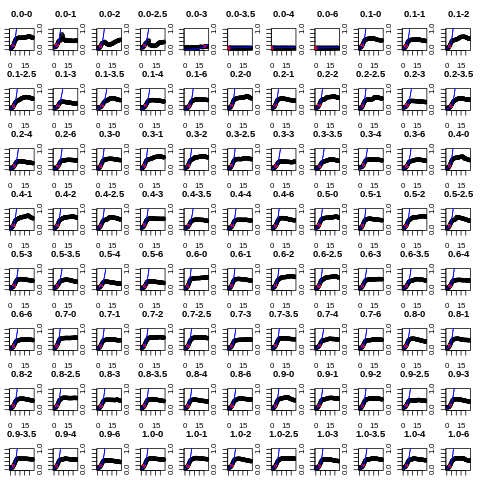

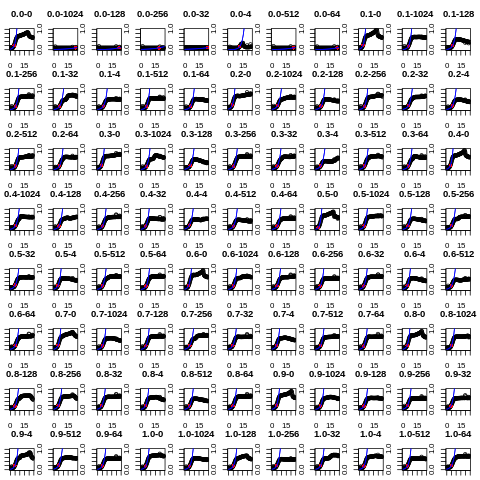

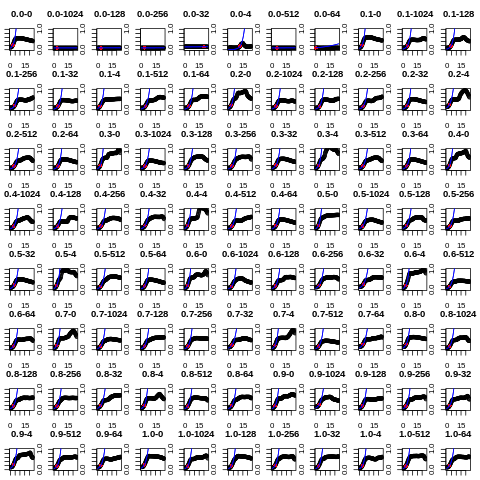

In [26]:
%%R
options(repr.plot.width = 22, repr.plot.height = 16)
par(mfrow = c(8, 11))
par(mar = c(1, 1,3, 1))

plot(many_fits1,ylim = c(-0.0, 1.0))

plot(many_fits2,ylim = c(-0.0, 1.0))
print("")
plot(many_fits3,ylim = c(-0.0, 1.0))
print("")


### Convert Growth rates to table

In [27]:
%%R

df_vmax_table1=plate1
cn=colnames(many_fit_res1)
index=match("mumax",cn)
for(col in wells){
    vcol=unlist(strsplit(col,""))
    x=vcol[1]
    if(length(vcol)==3){
        y=paste(vcol[2],vcol[3],sep="")
    }else{
        y=vcol[2]
    }
    
    freq_amp=plate1[x,y]
    if(freq_amp == "x"){next}
    subdf=many_fit_res1[many_fit_res1["strain_x"]==freq_amp]
    
    this_vmax=subdf[index]
    df_vmax_table1[x,y]=this_vmax
    
}
df_vmax_table1

df_vmax_table2=plate2
df_vmax_table3=plate2

for(col in wells){
    vcol=unlist(strsplit(col,""))
    x=vcol[1]
    if(length(vcol)==3){
        y=paste(vcol[2],vcol[3],sep="")
    }else{
        y=vcol[2]
    }
    
    freq_amp=plate2[x,y]
    if(freq_amp == "x"){next}
    subdf=many_fit_res2[many_fit_res2["strain_x"]==freq_amp]
    this_vmax=subdf[index]
    df_vmax_table2[x,y]=this_vmax
    subdf=many_fit_res3[many_fit_res3["strain_x"]==freq_amp]
    this_vmax=subdf[index]
    df_vmax_table3[x,y]=this_vmax
    
}

df_vmax_table2
df_vmax_table3

  1              2              3              4              5             
A "0.4362909140" "0.4639835041" "0.4483593570" "0.5229199115" "0.4917813655"
B "0.3776341522" "0.4355890650" "0.3497126421" "0.4666274338" "0.4644502868"
C "0.0024394515" "0.4140770599" "0.4193945261" "0.3798142842" "0.3779877575"
D "0.0475569808" "0.4192817652" "0.4244444343" "0.4146066702" "0.4020098268"
E "0.0009193302" "0.4252316612" "0.4132189807" "0.4100718756" "0.3616924173"
F "0.0006836133" "0.3858994019" "0.3975234470" "0.4051085643" "0.3830922533"
G "0.0019154338" "0.3897730239" "0.3805473044" "0.3732576823" "0.3818657209"
H "0.0007428545" "0.4072596859" "0.3925605407" "0.3803259684" "0.3856627477"
  6              7              8              9              10            
A "0.5105612812" "0.5033519462" "0.4702217530" "0.3820405141" "0.4535258005"
B "0.4799742391" "0.4647805832" "0.4647730155" "0.4542234461" "0.3998570654"
C "0.3551375061" "0.2823844099" "0.3083315508" "0.3477553141" "0.3808501428"

### Calculate WT and Plasmid-bearin strains growth rates, plasmid cost, and relative fitness

In [31]:
%%R
tables<- list()
tables[[1]]=df_vmax_table1
tables[[2]]=df_vmax_table2
tables[[3]]=df_vmax_table3

plasmid_vmaxs<- vector()
wt_vmaxs<- vector()
relativeFitness<- vector()
costs<- vector()
for(this_table in tables){
    plasmid_vmaxs <- c(plasmid_vmaxs,  as.numeric(this_table[1,11]) )
    wt_vmaxs <- c(wt_vmaxs,  as.numeric(this_table[1,1]) )
    
    rf=as.numeric(this_table[1,11])/as.numeric(this_table[1,1])
    relativeFitness <- c(relativeFitness,  rf)
    costs <- c(costs,1- rf)
}
plasmid_vmaxs
wt_vmaxs
relativeFitness
print(costs)
print((c(mean(costs),sd(costs))))

[1] 0.03796646 0.11577998 0.17290426
[1] 0.10888357 0.06773273


## Estimate exponential phase duration from lag phase and time to reach maxOD

In [32]:
%%R
growths<- list()
growths[[1]]=df_growths1
growths[[2]]=df_growths2
growths[[3]]=df_growths3

k_tables<- list()
k_tables[[1]]=k_table1
k_tables[[2]]=k_table2
k_tables[[3]]=k_table3

lag_tables<- list()
lag_tables[[1]]=llag_table1
lag_tables[[2]]=llag_table2
lag_tables[[3]]=llag_table3

# lag_tables[[1]]=lag_table1
# lag_tables[[2]]=lag_table2
# lag_tables[[3]]=lag_table3


timess<- list()
timess[[1]]=time_min1
timess[[2]]=time_min2
timess[[3]]=time_min3


plasmid_lags<- vector()
plasmid_ks<- vector()
plasmid_tmaxs<- vector()
plasmid_exps<- vector()

wt_lags<- vector()
wt_ks<- vector()
wt_tmaxs<- vector()
wt_exps<- vector()

print("Plasmid")
rx=mapply(list,growths,k_tables,lag_tables,timess, SIMPLIFY=F)
for(x in rx){
    k_table=x[2][[1]]
    df_growths=x[1][[1]]
    k_table=x[2][[1]]
    lag_table=x[3][[1]]
    time_min=x[4][[1]]
    
    this_plasmid_lag=as.numeric(lag_table[1,11])
    this_k=round(as.numeric(k_table[1,11]),digits=3)
    
    this_ods=as.vector( subset(df_growths,strain_x=="1.0-0")["value"])[[1]]
    #print(this_ods)
    for (i in seq_along(this_ods)){
        #if( (this_ods[[i]]>this_k)&(this_ods[[i+1]]>this_k)&(this_ods[[i+2]]>this_k) ){ break }
        
        this_sd=sd(c(this_ods[[i]],this_ods[[i+1]],this_ods[[i+2]],this_ods[[i+3]]))#,this_k))
        if(this_sd<=.0075 &  time_min[i]>this_plasmid_lag ){ break }
    }
    time_at_max=time_min[i+1]
    plasmid_exp_duration=time_at_max-this_plasmid_lag
    #print(c(time_at_max,this_plasmid_lag,this_k))
    print(plasmid_exp_duration)
    plasmid_lags<-c(plasmid_lags,this_plasmid_lag)
    plasmid_ks<-c(plasmid_ks,this_k)
    plasmid_tmaxs<-c(plasmid_tmaxs,time_at_max)
    plasmid_exps<-c(plasmid_exps,plasmid_exp_duration)
  }
print("WT")
for(x in rx){
    k_table=x[2][[1]]
    df_growths=x[1][[1]]
    k_table=x[2][[1]]
    lag_table=x[3][[1]]
    time_min=x[4][[1]]
    
    
    this_wt_lag=as.numeric(lag_table[1,1])
    this_k=round(as.numeric(k_table[1,1]),digits=3)
    
    this_ods=as.vector( subset(df_growths,strain_x=="0.0-0")["value"])[[1]]
    #print(this_ods)
    for (i in seq_along(this_ods)){
        #if( (this_ods[[i]]>this_k)&(this_ods[[i+1]]>this_k)&(this_ods[[i+2]]>this_k) ){ break }
        
        this_sd=sd(c(this_ods[[i]],this_ods[[i+1]],this_ods[[i+2]],this_ods[[i+3]]))#,this_k))
        if(this_sd<=.0075 &  time_min[i]>this_wt_lag ){ break }
    }
    time_at_max=time_min[i+1]
    wt_exp_duration=time_at_max-this_wt_lag
    #print(c(time_at_max,this_wt_lag,this_k))
    print(wt_exp_duration)
    wt_lags<-c(wt_lags,this_wt_lag)
    wt_ks<-c(wt_ks,this_k)
    wt_tmaxs<-c(wt_tmaxs,time_at_max)
    wt_exps<-c(wt_exps,wt_exp_duration)
}


[1] "Plasmid"
[1] 5.78161
[1] 6.467991
[1] 6.187811
[1] "WT"
[1] 6.479354
[1] 6.60791
[1] 4.919862


### Visualize exponential phase by replicates

[1] "plasmid"
[1] "WT"
TableGrob (3 x 2) "arrange": 6 grobs
  z     cells    name                     grob
1 1 (1-1,1-1) arrange lattice[GRID.lattice.23]
2 2 (1-1,2-2) arrange lattice[GRID.lattice.24]
3 3 (2-2,1-1) arrange lattice[GRID.lattice.25]
4 4 (2-2,2-2) arrange lattice[GRID.lattice.26]
5 5 (3-3,1-1) arrange lattice[GRID.lattice.27]
6 6 (3-3,2-2) arrange lattice[GRID.lattice.28]


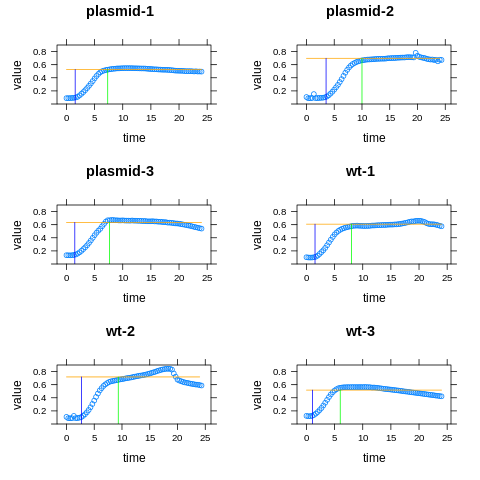

In [33]:
%%R

options(repr.plot.width = 5, repr.plot.height =2.5)
print("plasmid")

x =as.vector( subset(df_growths1,strain_x=="1.0-0"))
#y=as.list(x)
p1<-xyplot(value~time,x,main = "plasmid-1",ylim = c(-0.0, .9))
pp1=update(p1, panel = function(...) {
  panel.xyplot(...)
  panel.xyplot(c(0,24), c(plasmid_ks[1],plasmid_ks[1]), type="l", col = "orange")
    panel.xyplot(c(plasmid_tmaxs[1],plasmid_tmaxs[1]), c(0,plasmid_ks[1]), type="l", col = "green")
    panel.xyplot(c(plasmid_lags[1],plasmid_lags[1]), c(0,plasmid_ks[1]), type="l", col = "blue")
})
#print(pp1)
x =as.vector( subset(df_growths2,strain_x=="1.0-0"))
#y=as.list(x)
p2<-xyplot(value~time,x,main = "plasmid-2",ylim = c(-0.0, .9))
pp2=update(p2, panel = function(...) {
  panel.xyplot(...)
  panel.xyplot(c(0,24), c(plasmid_ks[2],plasmid_ks[2]), type="l", col = "orange")
    panel.xyplot(c(plasmid_tmaxs[2],plasmid_tmaxs[2]), c(0,plasmid_ks[2]), type="l", col = "green")
    panel.xyplot(c(plasmid_lags[2],plasmid_lags[2]), c(0,plasmid_ks[2]), type="l", col = "blue")
})
x =as.vector( subset(df_growths3,strain_x=="1.0-0"))
#y=as.list(x)
#print(pp2)
p3<-xyplot(value~time,x,main = "plasmid-3",ylim = c(-0.0, .9))
pp3=update(p3, panel = function(...) {
  panel.xyplot(...)
  panel.xyplot(c(0,24), c(plasmid_ks[3],plasmid_ks[3]), type="l", col = "orange")
    panel.xyplot(c(plasmid_tmaxs[3],plasmid_tmaxs[3]), c(0,plasmid_ks[3]), type="l", col = "green")
    panel.xyplot(c(plasmid_lags[3],plasmid_lags[3]), c(0,plasmid_ks[3]), type="l", col = "blue")
})


#print(pp3)
##########################
x =as.vector( subset(df_growths1,strain_x=="0.0-0"))
#y=as.list(x)
p1<-xyplot(value~time,x,main = "wt-1",ylim = c(-0.0, .9))
p1=update(p1, panel = function(...) {
  panel.xyplot(...)
  panel.xyplot(c(0,24), c(wt_ks[1],wt_ks[1]), type="l", col = "orange")
    panel.xyplot(c(wt_tmaxs[1],wt_tmaxs[1]), c(0,wt_ks[1]), type="l", col = "green")
    panel.xyplot(c(wt_lags[1],wt_lags[1]), c(0,wt_ks[1]), type="l", col = "blue")
})
#print(p1)
print("WT")
x =as.vector( subset(df_growths2,strain_x=="0.0-0"))
#y=as.list(x)
p2<-xyplot(value~time,x,main = "wt-2",ylim = c(-0.0, .9))
p2=update(p2, panel = function(...) {
  panel.xyplot(...)
  panel.xyplot(c(0,24), c(wt_ks[2],wt_ks[2]), type="l", col = "orange")
    panel.xyplot(c(wt_tmaxs[2],wt_tmaxs[2]), c(0,wt_ks[2]), type="l", col = "green")
    panel.xyplot(c(wt_lags[2],wt_lags[2]), c(0,wt_ks[2]), type="l", col = "blue")
})
#print(p2)
x =as.vector( subset(df_growths3,strain_x=="0.0-0"))
#y=as.list(x)
p3<-xyplot(value~time,x,main = "wt-3",ylim = c(-0.0, .9))
p3=update(p3, panel = function(...) {
  panel.xyplot(...)
  panel.xyplot(c(0,24), c(wt_ks[3],wt_ks[3]), type="l", col = "orange")
    panel.xyplot(c(wt_tmaxs[3],wt_tmaxs[3]), c(0,wt_ks[3]), type="l", col = "green")
    panel.xyplot(c(wt_lags[3],wt_lags[3]), c(0,wt_ks[3]), type="l", col = "blue")
})
#print(p3)

px=grid.arrange(pp1,pp2,pp3,p1,p2,p3,ncol=2)
px



## Finding model parameters

### Parameters description

In [34]:
%%R
x='NA'
#ρ=1     ## cost by individual   
σ=x   ## exponential fase duration  (hrs)
n=x   ## plasmid copy number
γ=x    ###population growth factor   
r=x  ### plasmid growth rate  (divisions/hr)
ρ=x  ### wt growth rate 'advantage'   (divisions/hr)
d=x   #number of divisons per unit of time
μ_n=x     ### 1-day fraction of segregants
k_n=x  # fistness cost (population genetics)


In [35]:
%%R

print((c(mean(plasmid_exps)+mean(plasmid_lags),mean(wt_exps)+mean(wt_lags))))
print((c(mean(plasmid_exps),mean(wt_exps))))
print((c(mean(plasmid_vmaxs),mean(wt_vmaxs))))

[1] 8.333333 7.776667
[1] 6.145804 6.002375
[1] 0.4354352 0.4877700


### Measured parameters

In [36]:
%%R

σM=mean(c(mean(plasmid_exps),mean(wt_exps)))
#σ=mean(plasmid_tmaxs)
print(c("σ",σM))
k_nM=mean(costs)
print(c("k_n",k_nM))

γM=100     ### determined by dulition plating


rM=mean(plasmid_vmaxs)
print(c("r",rM))

ρM=mean(wt_vmaxs)-rM  #mean(wt_vmaxs) =ρ + r
print(c("ρ",ρM))

n=19   




[1] "σ"                "6.07408961666667"
[1] "k_n"               "0.108883565654455"
[1] "r"            "0.4354352275"
[1] "ρ"            "0.0523347955"


### Parameters estimation using WF model for plasmid dynamics

In [37]:
%%R
print("ρ")
#ρ0=(1-k_nM)/(exp(1)*σM)
#print(ρ0)

print("γ")
γ0=exp(rM*σM)
print(γ0)


print("d")
d0=log(γM)/log(2)
print(d0)
d1=rM*σM/log(2)
print(d1)

print("σ")
σ0=log(γM)/rM
print(σ0)
σ1=log(γ0)/rM
print(σ1)


print("mu_n")
μ_n1=1-(1-2^(-n))^d0 
print(μ_n1)
μ_n2=1-exp(-rM*σM*2^-n)
print(μ_n2)
μ_n3=1- exp( (-rM*σM*2^-n)/log(2) )
print(μ_n3)

μ_n4=1-( ((rM*2^-n)+ρM)/( (rM*2^-n)*exp((rM*2^-n+ρM)*σM) +ρM) )  ##use this one
print(μ_n4)

print("k_n")
k_n0=(ρM*(1-exp(-(rM*2^(-n)+ρM)*σM)) )/(ρM+rM*2^(-n))  ###THIS IS THE one
print(k_n0)
k_n1=1-exp(-ρM*σM)
print(k_n1)
k_n2=(ρM*(1-exp(-(rM*2^-n)*σM)) )/(rM*2^-n)       
print(k_n2)




[1] "ρ"
[1] "γ"
[1] 14.08165
[1] "d"
[1] 6.643856
[1] 3.815745
[1] "σ"
[1] 10.57602
[1] 6.07409
[1] "mu_n"
[1] 1.267208e-05
[1] 5.044681e-06
[1] 7.277929e-06
[1] 5.938662e-06
[1] "k_n"
[1] 0.2723138
[1] 0.2723144
[1] 0.3178854


## Saving parameters short version

In [39]:
%%R
params_df=data.frame(μ_n=μ_n4,κ_n=k_n0,pFitnessCost=mean(costs),σ=σM,r=rM,ρ=ρM )


file_ptableS=paste(tableDir,"params_table_short.csv",sep="")
print(file_ptableS)
write.table(params_df,file_ptableS,row.names=FALSE,sep=",")
params_df


[1] "/content/drive/My Drive/SYNC_Projects/Plasmidia/ms/data/parameters/params_table_short.csv"
           μ_n       κ_n pFitnessCost       σ         r         ρ
1 5.938662e-06 0.2723138    0.1088836 6.07409 0.4354352 0.0523348


## Saving parameters full table

In [40]:
%%R
params_table=matrix("x",6,5)
colnames(params_table) <- c("Parameter","Measured value","Formula","Estimated value","Description")
#param_list<- c("r","ρ","σ","γ","μ_n","k_n","d","n")
param_list<- c("r","ρ","σ","μ_n","κ_n","n")
rownames(params_table) <- param_list
params_table[,"Parameter"]<- param_list


params_table["r","Description"]="plasmid strain growth rate" 
params_table["σ","Description"]="exponential phase duration"
params_table["n","Description"]="plasmid copy number"
#params_table["γ","Description"]="population growth factor"
params_table["ρ","Description"]="WT growth rate advantage"   
#params_table["d","Description"]="number of divisons per unit of time"
params_table["μ_n","Description"]="1-day fraction of segregants"
params_table["κ_n","Description"]="fitness cost"

params_table["r","Formula"]="NA" 
params_table["σ","Formula"]="σ=log(γ)/r"
params_table["σ","Formula"]="NA"
params_table["n","Formula"]="NA"
#params_table["γ","Formula"]="γ=exp(r*σ)"
#params_table["ρ","Formula"]="ρ=(1-k_n)/(exp(1)*σ)"   
params_table["ρ","Formula"]="NA"   
#params_table["d","Formula"]="d=log(γ)/log(2)"
params_table["μ_n","Formula"]="μ_n1-( ((r*2^-n)+ρ)/( (r*2^-n)*exp((r*2^-n+ρ)*σ) +ρ) )"
params_table["κ_n","Formula"]="κ_n=(ρ*(1-exp(-(r*2^-n+ρ)*σ)) )/(ρ+r*2^-n)"  

params_table["r","Measured value"]=rM
params_table["σ","Measured value"]=σM
params_table["n","Measured value"]=n
#params_table["γ","Measured value"]=100
params_table["ρ","Measured value"]=ρM
params_table["μ_n","Measured value"]="NA"
params_table["κ_n","Measured value"]="NA" #k_nM

params_table["r","Estimated value"]="NA"
#params_table["σ","Estimated value"]=σ1
params_table["σ","Estimated value"]="NA"
params_table["n","Estimated value"]="NA"
#params_table["γ","Estimated value"]="NA"
#params_table["ρ","Estimated value"]=ρ0
params_table["ρ","Estimated value"]="NA"
#params_table["d","Estimated value"]=d0
params_table["μ_n","Estimated value"]=μ_n4
params_table["κ_n","Estimated value"]=k_n0



file_ptable=paste(tableDir,"parameters_table.csv",sep="")
print(paste("Saving table...",file_ptable))
write.table(params_table, file = file_ptable, append = FALSE, quote = FALSE, sep = ",",eol = "\n", na = "NA", dec = ".", row.names = FALSE,col.names = TRUE, qmethod = c("escape", "double"),fileEncoding = "")
params_table

[1] "Saving table... /content/drive/My Drive/SYNC_Projects/Plasmidia/ms/data/parameters/parameters_table.csv"
    Parameter Measured value    
r   "r"       "0.4354352275"    
ρ   "ρ"       "0.0523347955"    
σ   "σ"       "6.07408961666667"
μ_n "μ_n"     "NA"              
κ_n "κ_n"     "NA"              
n   "n"       "19"              
    Formula                                                 
r   "NA"                                                    
ρ   "NA"                                                    
σ   "NA"                                                    
μ_n "μ_n1-( ((r*2^-n)+ρ)/( (r*2^-n)*exp((r*2^-n+ρ)*σ) +ρ) )"
κ_n "κ_n=(ρ*(1-exp(-(r*2^-n+ρ)*σ)) )/(ρ+r*2^-n)"            
n   "NA"                                                    
    Estimated value        Description                   
r   "NA"                   "plasmid strain growth rate"  
ρ   "NA"                   "WT growth rate advantage"    
σ   "NA"                   "exponential phase duration"  


## Plasmid cost by Growth rates fraction

In [45]:
%%R
#alterantive cost
pmvm=mean(plasmid_vmaxs)
wtmvm=mean(wt_vmaxs)
print(paste("relative fitness: ",pmvm/wtmvm))
print(paste("Plasmid cost: ",(1-pmvm/wtmvm)))

[1] "relative fitness:  0.89270600276311"
[1] "Plasmid cost:  0.10729399723689"
